[ 9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  1.0041525e+00  1.0041525e+00  1.0041525e+00  1.0252678e+00
  1.0030735e+00  1.0041525e+00  1.0041525e+00  1.0041525e+00
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7842991e-01
  9.8638815e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.8630220e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.8636270e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.6999729e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  9.7001314e-01  9.7001314e-01  9.7001314e-01  9.7001314e-01
  2.9700041e+00  3.00405

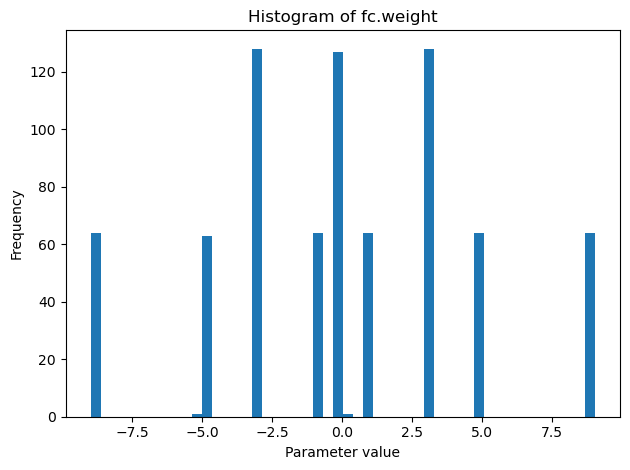

[-0.44163594]


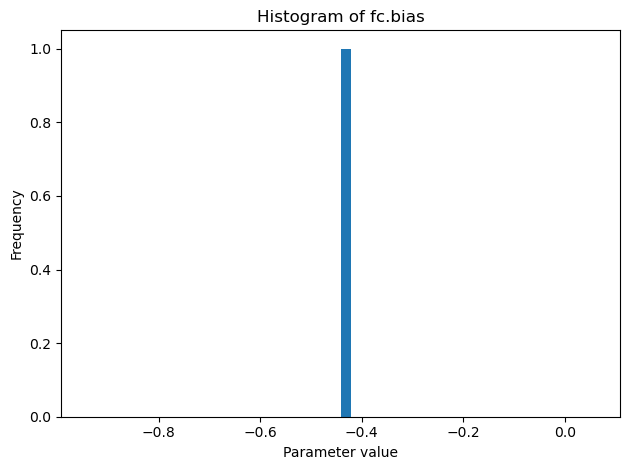

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm
import torch.nn as nn

# 1) Minimal model definition matching your single-layer net
class ChessNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(12 * 64, 1)

    def forward(self, x):
        return torch.tanh(self.fc(x))

# 2) Load state_dict from best.pth
model = ChessNet()
state = torch.load('best.pth', map_location='cpu')
model.load_state_dict(state)

# 3) Extract and reshape weights: (1, 12*64) → (12, 64) → (12, 8, 8)
w = model.fc.weight.detach().cpu().numpy().reshape(12, 64)
boards = w.reshape(12, 8, 8)

# 4) Plotting
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Piece-type Weight Heatmaps\n(green=positive, white=0, red=negative)', fontsize=16)

# Center the colormap at zero
max_abs = np.max(np.abs(boards))
norm = TwoSlopeNorm(vmin=-max_abs, vcenter=0.0, vmax=max_abs)

names = [
    'White Pawn', 'White Knight', 'White Bishop', 'White Rook',
    'White Queen', 'White King',
    'Black Pawn', 'Black Knight', 'Black Bishop', 'Black Rook',
    'Black Queen', 'Black King'
]

for ax, board, name in zip(axes.flatten(), boards, names):
    im = ax.imshow(board, cmap='RdYlGn', norm=norm)
    ax.set_title(name)
    ax.axis('off')

# common colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(),
                    shrink=0.6, orientation='vertical')
cbar.set_label('Weight')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [ ]:
# --- visualize_weights.py ---
import torch
import matplotlib.pyplot as plt
from train_bot import ChessNet

# Load model state
state_dict = torch.load('best.pth', map_location='cpu')

# Initialize model and load weights
model = ChessNet()
model.load_state_dict(state_dict)
model.eval()

# Iterate through parameters and plot histograms
for name, param in model.named_parameters():
    data = param.detach().cpu().numpy().flatten()

    print(data)
    plt.figure()
    plt.hist(data, bins=50)
    plt.title(f"Histogram of {name}")
    plt.xlabel("Parameter value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [2]:
model.named_parameters()

<generator object Module.named_parameters at 0x000001799E845740>

In [ ]:
# import torch
# from train_bot import ChessNet

# # 1. Load your checkpoint
# ckpt = torch.load('best.pth', map_location='cpu')

# # 2. Instantiate your model and load (allow partial if you need strict=False)
# model = ChessNet()
# model.load_state_dict(ckpt, strict=False)

# # 3. Walk through every parameter tensor and replace NaN/∞ with 0
# for name, param in model.named_parameters():
#     if not torch.is_floating_point(param.data):
#         continue
#     param.data = torch.nan_to_num(
#         param.data,
#         nan=0.0,
#         posinf=0.0,
#         neginf=0.0
#     )

# # 4. (Optional) also clean any buffers, e.g. running_mean/running_var if you have batch-norm:
# for buf_name, buf in model.named_buffers():
#     if torch.is_floating_point(buf):
#         buf.data = torch.nan_to_num(
#             buf.data,
#             nan=0.0,
#             posinf=0.0,
#             neginf=0.0
#         )

# # 5. Save the cleaned state_dict
# torch.save(model.state_dict(), 'best.pth')
# print("✓ All NaNs and infs reset to 0 in best.pth")


✓ All NaNs and infs reset to 0 in best.pth
